<a href="https://colab.research.google.com/github/hehuan2363/RamdonStuff/blob/main/Ipadapter_faceID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install insightface

In [2]:
!pip install onnxruntime

In [3]:
import torch
import cv2
from insightface.app import FaceAnalysis


app = FaceAnalysis(name="buffalo_l", providers=['CUDAExecutionProvider', 'CPUExecutionProvider'])
app.prepare(ctx_id=0, det_size=(640, 640))

image = cv2.imread("232.jpg")
faces = app.get(image)

faceid_embeds = torch.from_numpy(faces[0].normed_embedding).unsqueeze(0)


/usr/local/lib/python3.10/dist-packages/onnxruntime/capi/onnxruntime_inference_collection.py:69: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'AzureExecutionProvider, CPUExecutionProvider'
  warnings.warn(


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/w600k_r50.onnx recognition ['None', 3, 112, 112] 127.5 127.5
set det-size: (640, 640)


/usr/local/lib/python3.10/dist-packages/insightface/utils/transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


In [4]:
!pip install diffusers

In [11]:
!git clone https://github.com/tencent-ailab/IP-Adapter.git
!cd IP-Adapter


Cloning into 'IP-Adapter'...
remote: Enumerating objects: 349, done.
remote: Counting objects: 100% (185/185), done.
remote: Compressing objects: 100% (94/94), done.
remote: Total 349 (delta 118), reused 140 (delta 91), pack-reused 164
Receiving objects: 100% (349/349), 76.75 MiB | 21.81 MiB/s, done.
Resolving deltas: 100% (175/175), done.


In [13]:
!pip install git+https://github.com/tencent-ailab/IP-Adapter.git

  Cloning https://github.com/tencent-ailab/IP-Adapter.git to /tmp/pip-req-build-a38ft994
  Running command git clone --filter=blob:none --quiet https://github.com/tencent-ailab/IP-Adapter.git /tmp/pip-req-build-a38ft994
  Resolved https://github.com/tencent-ailab/IP-Adapter.git to commit 6843f295d4a7c651d243e84667a197b68591a980
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for ip-adapter: filename=ip_adapter-0.1.0-py3-none-any.whl size=25533 sha256=3802d710d4a93208f830b959128ab73ce9ce8dc0959d961255aee708128b1208
  Stored in directory: /tmp/pip-ephem-wheel-cache-q5dnkarb/wheels/db/b9/4a/cbddf1447388c3c9e674d4b1eb51f4661cd8ae89b90f34deee
Successfully built ip-adapter


In [15]:
!pip install einops

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 1.5 MB/s eta 0:00:00


In [17]:
!wget https://huggingface.co/h94/IP-Adapter-FaceID/resolve/main/ip-adapter-faceid_sd15.bin?download=true


--2023-12-21 22:18:22--  https://huggingface.co/h94/IP-Adapter-FaceID/resolve/main/ip-adapter-faceid_sd15.bin?download=true
Resolving huggingface.co (huggingface.co)... 18.239.50.80, 18.239.50.16, 18.239.50.103, ...
Connecting to huggingface.co (huggingface.co)|18.239.50.80|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs-us-1.huggingface.co/repos/36/ca/36ca54ff1895000df817b45a5ae71fccd14170b0843d8adc2ba7944d9ac903e9/201344e22e6f55849cf07ca7a6e53d8c3b001327c66cb9710d69fd5da48a8da7?response-content-disposition=attachment%3B+filename*%3DUTF-8%27%27ip-adapter-faceid_sd15.bin%3B+filename%3D%22ip-adapter-faceid_sd15.bin%22%3B&response-content-type=application%2Foctet-stream&Expires=1703456302&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTcwMzQ1NjMwMn19LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy11cy0xLmh1Z2dpbmdmYWNlLmNvL3JlcG9zLzM2L2NhLzM2Y2E1NGZmMTg5NTAwMGRmODE3YjQ1YTVhZTcxZmNjZDE0MTcwYjA4NDNkOGFkYzJiYTc5ND

In [5]:
import torch
from diffusers import StableDiffusionPipeline, DDIMScheduler, AutoencoderKL
from PIL import Image

from ip_adapter.ip_adapter_faceid import IPAdapterFaceID

base_model_path = "SG161222/Realistic_Vision_V4.0_noVAE"
vae_model_path = "stabilityai/sd-vae-ft-mse"
ip_ckpt = "ip-adapter-faceid_sd15.bin"
device = "cuda"

noise_scheduler = DDIMScheduler(
    num_train_timesteps=1000,
    beta_start=0.00085,
    beta_end=0.012,
    beta_schedule="scaled_linear",
    clip_sample=False,
    set_alpha_to_one=False,
    steps_offset=1,
)
vae = AutoencoderKL.from_pretrained(vae_model_path).to(dtype=torch.float16)
pipe = StableDiffusionPipeline.from_pretrained(
    base_model_path,
    torch_dtype=torch.float16,
    scheduler=noise_scheduler,
    vae=vae,
    feature_extractor=None,
    safety_checker=None
)

# load ip-adapter
ip_model = IPAdapterFaceID(pipe, ip_ckpt, device)

# generate image
prompt = "photo of a woman in red dress in a garden"
negative_prompt = "monochrome, lowres, bad anatomy, worst quality, low quality, blurry"

images = ip_model.generate(
    prompt=prompt, negative_prompt=negative_prompt, faceid_embeds=faceid_embeds, num_samples=2, width=512, height=768, num_inference_steps=30, seed=2023
)


Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.
Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

In [7]:
images


[<PIL.Image.Image image mode=RGB size=512x768>,
 <PIL.Image.Image image mode=RGB size=512x768>]

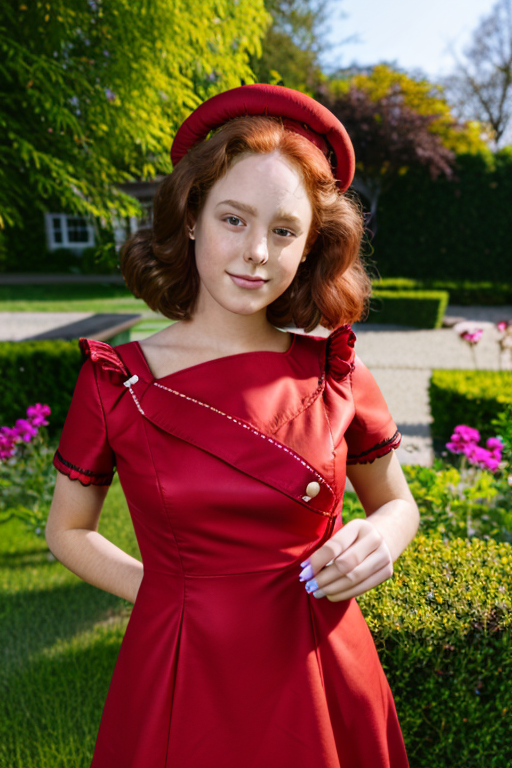

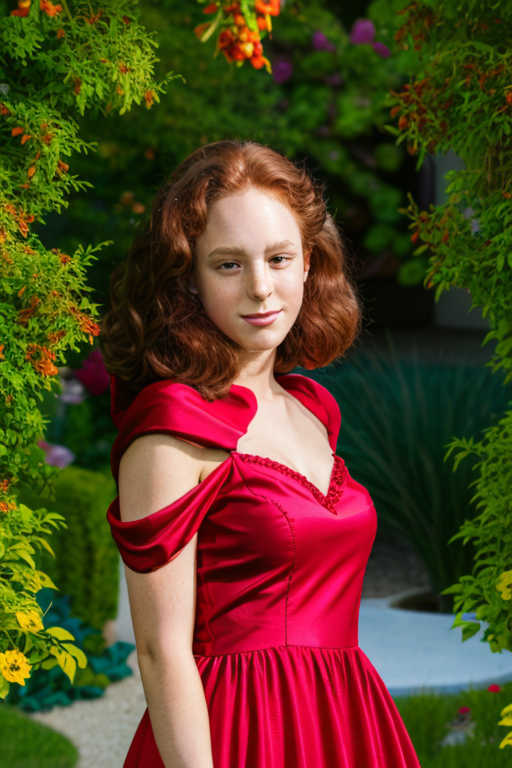

In [9]:
from IPython.display import display

# Assuming images is a list of PIL Images
for img in images:
    # Display the image
    display(img)


In [24]:
from numba import cuda
device2 = cuda.get_current_device()
device2.reset()

In [26]:
import torch
print(torch.cuda.is_available())


True
